In [260]:
import random as rnd

In [261]:
import numpy as np
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt

rnd.seed(42)
m = 10 #length?
d = [] #dimension
xrange = [-1, 1]

def getRandomWert():
    return rnd.randint(xrange[0], xrange[1]), rnd.randint(xrange[0], xrange[1])

def addRandomWert(list):
    list.append(getRandomWert())

for _ in range(m):
    addRandomWert(d)

print(d)

punkt1 = getRandomWert()
punkt2 = getRandomWert()
print(punkt1, punkt2)


[(1, -1), (-1, 1), (0, -1), (-1, -1), (1, -1), (1, 1), (1, -1), (1, 0), (-1, -1), (-1, -1)]
(-1, 1) (1, -1)


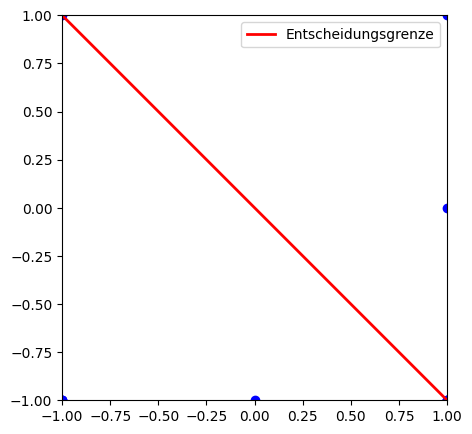

In [262]:
fig, ax = plt.subplots(1, figsize=(5,5))

x_vals = np.array(xrange)  # [-1, 1]
# Gerade durch punkt1 und punkt2: y = m*x + b
m_line = (punkt2[1]-punkt1[1])/(punkt2[0]-punkt1[0])
b_line = punkt1[1] - m_line*punkt1[0]

y_vals = m_line * x_vals + b_line

ax.plot(x_vals, y_vals, 'r-', linewidth=2, label='Entscheidungsgrenze')

# Punkte plotten
d_arr = np.array(d)
ax.scatter(d_arr[:,0], d_arr[:,1], color='blue')

ax.set_xlim(xrange)
ax.set_ylim(xrange)
ax.set_aspect('equal')
plt.legend()
plt.show()


In [263]:
#Positive seite
def activation(z):
    return 1 if z > 0 else -1

def predict(x,w):
    z = np.dot(x,w)
    return activation(z)

#Add Bias:
XTrainingsData = np.hstack([np.ones((len(d),1)), np.array(d)])  # Bias = 1 vorne
#calc current points
yTrainingsData = []  # leere Liste für Labels

for punkt in d:
    x, y_coord = punkt
    if y_coord > m_line * x + b_line:
        y_label = 1
    else:
        y_label = -1
    yTrainingsData.append(y_label)  # in Liste speichern

yTrainingsData = np.array(yTrainingsData)  # am Ende in ein NumPy-Array umwandeln

#print(X)
#print(y)
def printResult(x,y):

    for p in zip(x,y):

        print(f"{p[1]}: {p[0]}")
printResult(XTrainingsData,yTrainingsData)

-1: [ 1.  1. -1.]
-1: [ 1. -1.  1.]
-1: [ 1.  0. -1.]
-1: [ 1. -1. -1.]
-1: [ 1.  1. -1.]
1: [1. 1. 1.]
-1: [ 1.  1. -1.]
1: [1. 1. 0.]
-1: [ 1. -1. -1.]
-1: [ 1. -1. -1.]


In [264]:
def train_perceptron(X,y,lr=1, max_stes=1000):
    wWeight = np.zeros(len(X[0]))

    steps = 0

    while True:
        steps += 1
        missclassified = [] #select missclassified
        for xi, yi in zip(X, y):
            if predict(xi,wWeight) != yi:
                missclassified.append([xi,yi])

        if not missclassified:
            break

        #for xi,yi in missclassified:
        #    #change weigts
        #    #wWeight += lr * yi * xi #w := w + a( y^(i) - h( x1^(i) )) x^(i) ##a = lernrate #h vorhersage/heuristic, y wahrer wert
        #    wWeight = wWeight + lr * (yi - predict(xi,wWeight)) * xi
         # zufälliger falsch klassifizierter Punkt
        i = rnd.choice(missclassified)
        wWeight = wWeight + lr * (i[1] - predict(i[0],wWeight)) * i[0]

    return steps,wWeight

In [265]:

stepCounter = 0
steps = 1000
for _ in range(steps):
    s,wTrained = train_perceptron(XTrainingsData,yTrainingsData)
    stepCounter += s

durchschnitt = stepCounter/1000
print(f"Durchschnitt: {durchschnitt}, [Total:{stepCounter} by {steps}steps]")



Durchschnitt: 7.056, [Total:7056 by 1000steps]
